# Continuous random variables

This notebook contains all the figure generation code for [Section 2.5 Continuous random variables]() in the **No Bullshit Guide to Statistics**.

#### Notebook setup

We'll start by importing the Python modules we'll need for this notebook.

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

# %config InlineBackend.figure_format = 'retina'

In [3]:
from ministats import plot_pdf_and_cdf

In [4]:
# set random seed for repeatability
np.random.seed(3)

## Definitions

#### Example 1: Uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) $\mathcal{U}(0,1)$ is described by the following probability density function:
$$
  p_U(u) =
  \begin{cases}
      1 & \mathrm{for}\ 0 \le u \le 1, \\
      0 & \mathrm{for}\ u<0\ \mathrm{or}\ u>1.
  \end{cases}
$$
where $U$ is the name of the random variable and $u$ are particular values it can take on.

The above equation describes tells you how likely it is to observe $\{U=u\}$.
For a uniform distribution $\mathcal{U}(0,1)$, each $u$ between 0 and 1 is equally likely to occur,
and values of $u$ outside this range have zero probability of occurring.

**Computer simulation**

We'll introduce computer models for random variables is [Section 2.1.5 — Computer models for random variables](#computer_models) below, but since we're looking at a notebook, we can show a little preview of the calculations you'll learn by the end of the section.

In [5]:
# define the computer model `rvU` for the random variable U
from scipy.stats import uniform
rvU = uniform(0, 1)

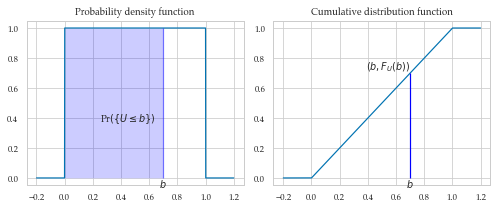

In [6]:
filename = "figures/prob/uniform_pdf_and_CDF_until_b.pdf"

with plt.rc_context({"figure.figsize":(7,3)}):
    fig, axs = plot_pdf_and_cdf(rvU, b=0.7, xlims=[-0.2,1.2], rv_name="U", title=None)
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

#### Example 2: Normal distribution

A random variable $N$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu,\sigma)$ is described by the probability density function:
$$ \Large
    f_N(n) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{\small -\tfrac{(n-\mu)^2}{2\sigma^2}}.
$$

The mean $\mu$ (the Greek letter *mu*) and the standard deviation $\sigma$ (the Greek letter *sigma*) are called the parameters of the distribution.

The math notation $\mathcal{N}(\mu, \sigma)$ is used to describe the whole family of normal probability distributions,
and $N \sim \mathcal{N}(1000, 100)$ is a particular instance of the distribution with mean $\mu = 1000$ and standard deviation $\sigma = 100$.

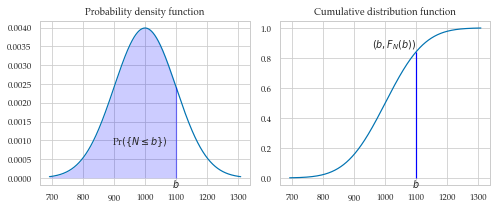

In [7]:
filename = "figures/prob/normal_pdf_and_CDF_until_b.pdf"

# define the computer model `rvN` for the random variable N
from scipy.stats import norm
mean = 1000
std = 100
rvN = norm(mean, std)

with plt.rc_context({"figure.figsize":(7,3)}):
    fig, axs = plot_pdf_and_cdf(rvN, b=1100, rv_name="N", title=None)
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

The code example below shows the calculation of the probability $\Pr\!\left( \{ 800 \leq N \leq 900 \} \right)$,
which corresponds to the integral $\int_{n=800}^{n=900} f_N(n) dn$.

## Calculations with random variables

### Example 1: mean and variance of the uniform distribution


### Example 2: mean and variance of a normal distribution

## Probability models

In probability theory, we model data as instances of a **random variable** $X$ described by a **probability distribution** $f_X$ (a math function) with particular parameters (usually denoted with Greek letters like $\theta$, $\mu$, $\sigma$, etc.).

Multiple different ways to specify and interact with probability distributions:
- exact math model function (CDF from which we can extract pdf density function or pmf mass function). Math models allow us the most options: `rvs`, `cdf`, `pdf/pmf`, and stats like `mean`, `median`, `var/std`, `quartiles`.
- random draws form a generative process
- random draws from a real world process
- data for an entire population (census)
- sample data from a population
- synthetic data obtained by resampling
  - bootstrap estimation for any distribution
  - permutation test for no-difference-between-groups hypotheses

<a name="computer_models"></a>

## Computer models for random variables

- `<model>`: the family of probability distributions
- `<params>`: parameters of the model—specific value of the control knobs we choose in the general family of distributions to create a particular distribution
- `<model>(<params>)`: a particular instance of probability model created by choosing a model family `<model>` and the model parameters `<params>`.
  - example 1: uniform family of distribution $\mathcal{U}(\alpha,\beta)$ with parameters $\alpha$ and $\beta$.  
  - example 2: normal family of distribution $\mathcal{N}(\mu,\sigma)$ with parameters $\mu$ and $\sigma$.
- $\sim$: math shorthand symbol that stands for "is distributed according to."
  For example $X \sim \texttt{model}(\theta)$ means the random variable $X$
  is distributed according to model instance $\texttt{model}$ and parameters $\theta$.


In [8]:
from scipy.stats import norm

# create a normal random variable with mean 1000 and std 100
rvN = norm(1000, 100)

In [9]:
type(rvN)

scipy.stats._distn_infrastructure.rv_frozen

In [10]:
## see all attributes and methods:
# [attr for attr in dir(rvN) if "__" not in attr] 

### Plotting the probability functions

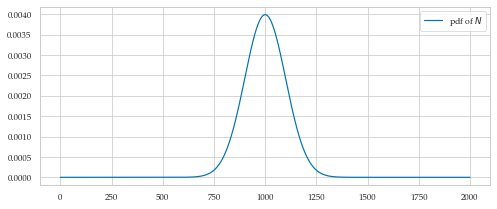

In [11]:
import matplotlib.pyplot as plt
filename = "figures/plot_of_pdf_of_rvN.pdf"

with plt.rc_context({"figure.figsize":(7,3)}):
    ns = np.linspace(0, 2000, 1000)
    fNs = rvN.pdf(ns)
    ax = sns.lineplot(x=ns, y=fNs, label="pdf of $N$")
    ax.figure.tight_layout()
    ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

The cumulative distribution is the integral of the probability density function:
$$
   F_N(b) = \textrm{Pr}(N \leq b) = \int_{-\infty}^b f_N(n) \, dn
$$


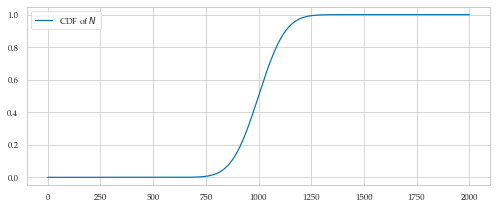

In [12]:
import matplotlib.pyplot as plt
filename = "figures/plot_of_CDF_of_rvN.pdf"

with plt.rc_context({"figure.figsize":(7,3)}):
    ns = np.linspace(0, 2000, 1000)
    FNs = rvN.cdf(ns)
    ax = sns.lineplot(x=ns, y=FNs, label="CDF of $N$")
    ax.figure.tight_layout()
    ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

### Computing expectations

Suppose the distributor accepts only bottles contain between 800 ml and 1200 ml,
and you'll receive a receive payment of $\$2$ for each bottle.
Bottles outside that range get rejected and you don't get paid for them.

In [13]:
def payment(n):
    if 800 <= n and n <= 1200:
        return 2
    else:
        return 0

In [14]:
# get paid if in spec
payment(1050)

2

In [15]:
# don't get paid if out of spec
payment(1250)

0

In [16]:
# expected value of payment
rvN.expect(payment, lb=0, ub=2000)

1.9089994722069916

Visually speaking, only parts of the probability mass of the random variable "count" towards the payment, the subset of the values inside the yellow region shown below.

<AxesSubplot:>

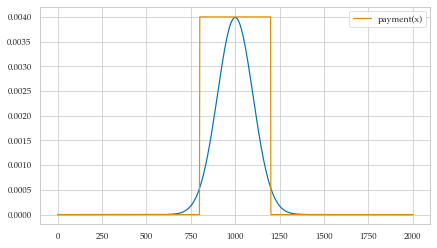

In [17]:
xs = np.linspace(0, 2000, 1000)
ys = [payment(x)/500 for x in xs]

sns.lineplot(x=xs, y=rvN.pdf(xs))
sns.lineplot(x=xs, y=ys, label="payment(x)")

## Multiple random variables

### Joint probability density functions

In [18]:
# via https://stackoverflow.com/questions/38698277/plot-normal-distribution-in-3d
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# parameters
mu = [1000, 10]
Sigma = [[200**2, 18**2], [18**2, 2**2]]


# multivariate normal
rvXY = multivariate_normal(mu, Sigma)

In [19]:
from scipy.stats.contingency import margins

# sample space
xmin = 0
xmax = 2000
ymin = 0
ymax = 20

# create two 1D grid with 100 points in each dimension
xs = np.linspace(xmin, xmax, 500)
ys = np.linspace(ymin, ymax, 500)
X, Y = np.meshgrid(xs, ys)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# compute the joint-probability density function values
fXY = rvXY.pdf(pos)

# compute marginal distibutoins
fXm, fYm = margins(fXY)
fX = fXm.flatten()
fY = fYm.flatten()

Text(0, 0.5, '$y$')

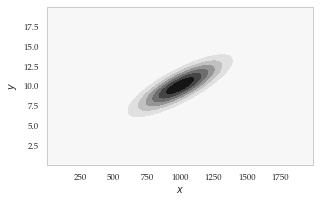

In [20]:
from matplotlib import cm
from matplotlib import gridspec


# contour plot
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 4])
fig = plt.figure()
ax = plt.subplot(gs[1,0])
# Filled Contour
cax = ax.contourf(fXY, origin = 'lower',
                  extent = (xmin, xmax, ymin, ymax),
                  cmap = "Greys")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [21]:
# # ALT 2. Manually iterate over (x,y) input pairs unravelled list of coords
# from matplotlib import cm

# xys = np.vstack([item.ravel() for item in [X, Y]])
# print("xys has shape", xys.shape)

# # temporary store for values of rvXY.pdf(xy)
# fXYs = np.ndarray(xys.shape[1])
# for i, xy in enumerate(xys.T):
#     fXYs[i] = rvXY.pdf(xy)
# Z = fXYs.reshape(X.shape) 

# # Create contour plot
# gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 4])
# fig = plt.figure()
# ax = plt.subplot(gs[1,0])
# cax = ax.contourf(Z, origin = 'lower',
#                   extent = (xmin, xmax, ymin, ymax),
#                   cmap = "Greys")

Text(0.5, 0, '$p_{XY}$')

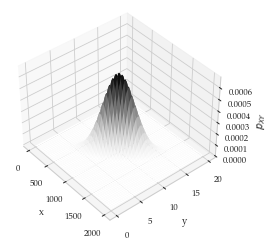

In [22]:
# 3D surface plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, fXY, cmap='Greys', linewidth=0)
ax.view_init(elev=40., azim=-40)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$p_{XY}$')

### Marginal density functions

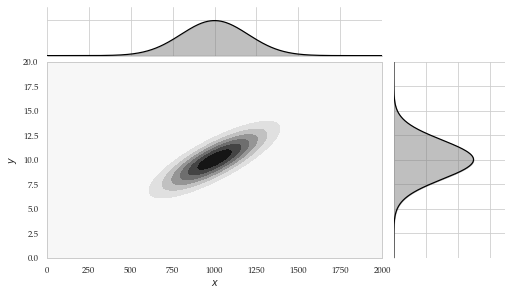

In [23]:
# contour plot
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 4])
fig = plt.figure()
ax = plt.subplot(gs[1,0])
# Filled Contour
cax = ax.contourf(fXY, origin = 'lower',
                  extent = (xmin, xmax, ymin, ymax),
                  cmap = "Greys")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
# # Contour Lines
# ax.contour(fXY, origin = 'lower',
#            extent = (xmin, xmax, ymin, ymax),
#            cmap = cm.bone)

# Turn off all axes
# ax.axis('off')

# Create X-marginal (top)
axt = plt.subplot(gs[0,0], sharex = ax, frameon = False, xlim = (xmin, xmax), ylim=(0, 1.4*fX.max()))
axt.plot(xs, fX, color = 'black')
axt.fill_between(xs, 0, fX, alpha=.5, color = 'gray')
axt.tick_params(labelbottom=False)
axt.tick_params(labelleft=False)

# Create Y-marginal (right)
axr = plt.subplot(gs[1,1], sharey = ax, frameon = False, xlim = (0, 1.4*fY.max()), ylim=(ymin, ymax))
axr.plot(fY, ys, color = 'black')
axr.fill_betweenx(ys, 0, fY, alpha = .5, color = 'gray')
axr.tick_params(labelbottom=False)
axr.tick_params(labelleft=False)

#Bring the marginals closer to the contour plot
fig.tight_layout(pad = 0.3)

### Conditional probability density functions

In [24]:
# tslices = [18, 20, 22]


# # RSCH: how to get slice at t of the kde approx surface of kprod data as a function

# # verts[i] is a list of (x, y) pairs defining polygon i.
# verts = [polygon_under_graph(x, poisson.pmf(l, x)) for l in lambdas]
# facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

# poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
# ax.add_collection3d(poly, zs=lambdas, zdir='y')

# ax.set(xlim=(0, 10), ylim=(1, 9), zlim=(0, 0.35),
#        xlabel='x', ylabel=r'$\lambda$', zlabel='probability')


In [25]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from scipy.stats import poisson
from scipy.stats import multivariate_normal


# parameters
mu = [1000, 10]
Sigma = [[200**2, 18**2], [18**2, 2**2]]


# multivariate normal
rvXY = multivariate_normal(mu, Sigma)

# sample space
xmin = 0
xmax = 2000
ymin = 0
ymax = 20

# create two 1D grid with 100 points in each dimension
xs = np.linspace(xmin, xmax, 500)
ys = np.linspace(ymin, ymax, 500)
X, Y = np.meshgrid(xs, ys)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# compute the joint-probability density function values
fXY = rvXY.pdf(pos)

In [26]:
def find_nearest1(array, value):
    idx,val = min(enumerate(array), key=lambda x: abs(x[1]-value))
    return idx

find_nearest1(xs, 1000)

250

In [27]:
def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], 0.), *zip(x, y), (x[-1], 0.)]


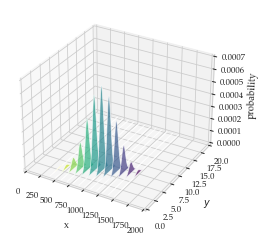

In [28]:
ax = plt.figure().add_subplot(projection='3d')

# x-coordinates of the slices
xcuts = range(400, 1600, 100)
ys = np.linspace(ymin, ymax, 1000)

# verts[i] is a list of (x, y) pairs defining polygon i.
verts = []
for xcut in xcuts:
    # y = rvXY.pdf((xcut,ys))  # TODO: figure out how to do properly
    xidx = find_nearest1(xs, xcut)
    fXY_at_xcut = fXY[xidx,:]
    vert = polygon_under_graph(ys, fXY_at_xcut)
    verts.append(vert)

facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=xcuts, zdir='x')

_ = ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), zlim=(0, 0.0007),
       xlabel='x', ylabel=r'$y$', zlabel='probability')


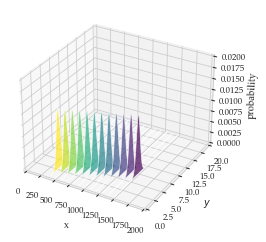

In [29]:
ax = plt.figure().add_subplot(projection='3d')

# x-coordinates of the slices
xcuts = range(400, 1600, 100)
ys = np.linspace(ymin, ymax, 1000)

# verts[i] is a list of (x, y) pairs defining polygon i.
verts = []
for xcut in xcuts:
    # y = rvXY.pdf((xcut,ys))  # TODO: figure out how to do properly
    xidx = find_nearest1(xs, xcut)
    fXY_at_xcut = fXY[xidx,:]
    fYgiven_xcut = fXY_at_xcut/np.sum(fXY_at_xcut)
    vert = polygon_under_graph(ys, fYgiven_xcut)
    verts.append(vert)

facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=xcuts, zdir='x')

_ = ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), zlim=(0, 0.02),
       xlabel='x', ylabel=r'$y$', zlabel='probability')


In [30]:
#verts

### Examples

#### Example 1: Multivariable uniform

In [31]:
xmin = 0
xmax = 100
ymin = 0
ymax = 10

# joint pdf of = uniform(100, 200) x uniform(10,20)
def fUV(x,y):
    A = (xmax-xmin) * (ymax-ymin)
    if xmin <= x and x <= xmax and ymin <= y and y <= ymax:
        return 1/A
    else:
        return 0.0


In [32]:
from scipy.stats import uniform

rvU = uniform(0,100)
rvV = uniform(0,10)

# joint pdf of = uniform(0,100) x uniform(0,10)
def fUV(u,v):
    return rvU.pdf(u) * rvV.pdf(v)


In [33]:
fUV(70,10)

0.001

In [34]:
from scipy.integrate import dblquad

dblquad(fUV, 0, 20, 0, 300)[0]

1.0000000000000004

(0.0, 0.002)

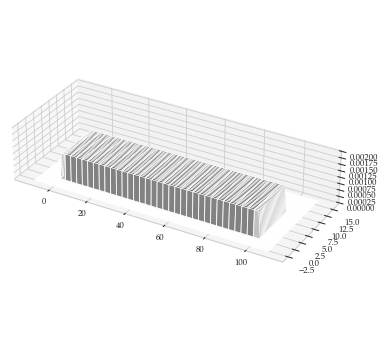

In [35]:
from mpl_toolkits.mplot3d import axes3d

fig1a = plt.figure(figsize=(12,6))
ax1a = fig1a.add_subplot(111, projection='3d')

us = np.arange(-10,110,1)
vs = np.arange(-3,16,0.1)
Us,Vs = np.meshgrid(us,vs)
fUVuv = np.vectorize(fUV)(Us,Vs)

# Plot a basic wireframe
# ax.plot_wireframe(X, Y, fUxy, rstride=10, cstride=20)
ax1a.plot_surface(Us, Vs, fUVuv, cmap="Greys")#  rstride=10, cstride=20)
ax1a.set_box_aspect((10,4,2))
ax1a.set_zlim(0,0.002)

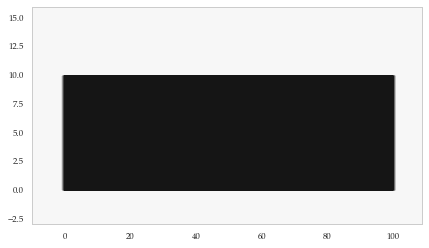

In [36]:
fig1b = plt.figure()
ax1b = fig1b.add_subplot(111)
ax1b.contourf(Us, Vs, fUVuv, cmap="Greys")

#### Example 2: Kombucha volume increasing with temperature

Consider now the joint sample space $(N,T)$,
where $T$ describes the temperature of the Kombucha that is going into the bottles,
and $N$ describes the volume that goes into each bottle.

Suppose the temperature random variable is normally distributed with standard deviation $\sigma_T = 2$
around the mean of $\mu_T = 20$,
which is written mathematically as $T \sim \mathcal{N}(20,2)$.
The variability of the volume of kombucha depends on the temperature $t$,
and is described by the random variable $N \sim \mathcal{N}(\mu_N,75)$,
where $\mu_N = 1000 + 35(t-20)$.
In other words,
the conditional distribution $f_{N|T}(n|t)$ is distributed according to:
$$
   f_{N|T} = \mathcal{N}(1000 + 35(T-20), 75).
$$

By studying the dependence between the bottling temperature and the variation in the volume,
you might be able to improve the reliability of the kombucha bottling process.
Recall that your distributor only pays for bottles that are within "spec" (mean of 1000 +/- 2 times std = $[800,1200]$).

In [37]:
from scipy.stats import norm

rvT = norm(20,2)

# joint pdf f_{NT}(n,t) = f_{N|T}(n|t) * f_T(t)
def fNT2(n,t):
    fNgivent = norm(1000+35*(t-20), 75)  # = f_{N|T=t}
    return fNgivent.pdf(n) * rvT.pdf(t)


In [38]:
ts = np.arange(15,25,0.2)
ns = np.arange(700,1300,10)
Ts, Ns = np.meshgrid(ts,ns)
fNT2nt = np.vectorize(fNT2)(Ns,Ts)

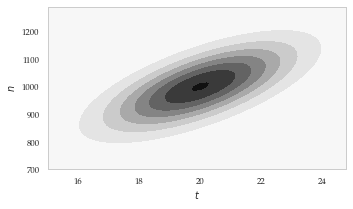

In [39]:
filename = "figures/prob/joint_pdf_f_NT_temp_dep_mean.pdf"

with plt.rc_context({"figure.figsize":(5,3)}):
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.contourf(Ts, Ns, fNT2nt, cmap="Greys")
    ax2.set_xlabel('$t$')
    ax2.set_ylabel('$n$')
    fig2.tight_layout()
    fig2.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

#### Example 3: Temperature-dependent variability

Consider now an alternative scenario in which the **variance** of the volume of kombucha $N$
varies with temperature.
The temperature random variable is $T \sim \mathcal{N}(20,2)$.
And the volume of kombucha is described by the random variable $N \sim \mathcal{N}(1000,\sigma_N)$,
where $\sigma_N = 100 + 5(t-20)$.
In other words,
the conditional distribution $f_{N|T}(n|t)$ is distributed according to:
$$
   f_{N|T} = \mathcal{N}(1000, 100 + 5(t-20)).
$$


In [40]:
from scipy.stats import norm

rvT = norm(20,2)

infos = {}
# joint pdf f_{NT}(n,t) = f_{N|T}(n|t) * f_T(t)
def fNT3(n,t):
    fNgivent = norm(1000, 100 + 14*(t-20))
    return fNgivent.pdf(n) * rvT.pdf(t)


In [41]:
ts = np.arange(15,25,0.2)
ns = np.arange(700,1300,10)
Ts, Ns = np.meshgrid(ts,ns)
fNT3nt = np.vectorize(fNT3)(Ns,Ts)

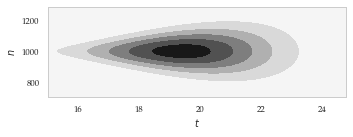

In [42]:
filename = "figures/prob/joint_pdf_f_NT_temp_dep_variance.pdf"

with plt.rc_context({"figure.figsize":(5,2)}):
    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111)
    ax3.contourf(Ts, Ns, fNT3nt, cmap="Greys")
    ax3.set_xlabel('$t$')
    ax3.set_ylabel('$n$')
    fig3.tight_layout()
    fig3.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [43]:
## ALT. Plot a basic wireframe
# from mpl_toolkits.mplot3d import axes3d
# fig = plt.figure(figsize=(12,6))
# ax = fig.add_subplot(111, projection='3d')
# # ax.plot_wireframe(X, Y, fUxy, rstride=10, cstride=20)
# ax.plot_surface(X, Y, fNT2xy, cmap="Greys")#  rstride=10, cstride=20)
# ax.set_box_aspect((10,4,2))
# # ax.set_zlim(0,0.002)

### Useful probability formulas

### Multivariable expectation
                                

### Independent, identically distributed random variabls

## Discussion

### Bulk of the normal distribution

How much of the total probability "weight" lies within $k$ standard deviations of the mean?

$$
\textrm{Pr}(\mu_N - k\sigma_N \leq N \leq \mu_N + k\sigma_N) \ = \ p_k.
$$

In [44]:
from scipy.integrate import quad
from scipy.stats import norm
rvN = norm(1000, 100)

In [45]:
mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

for k in [1, 2, 3]:
    I_k = [mu - k*sigma, mu + k*sigma]
    p_k = quad(rvN.pdf, *I_k)[0]
    print(f"p_{k} = Pr( N in {I_k} ) = {p_k:.3f}")

p_1 = Pr( N in [900.0, 1100.0] ) = 0.683
p_2 = Pr( N in [800.0, 1200.0] ) = 0.954
p_3 = Pr( N in [700.0, 1300.0] ) = 0.997


The code below highlights the interval $I_k$ and computes the probability $p_k$.
Change the value of $k$ to get different plots.

n = 1 interval contains 0.6826894921370859
n = 2 interval contains 0.9544997361036417
n = 3 interval contains 0.99730020393674


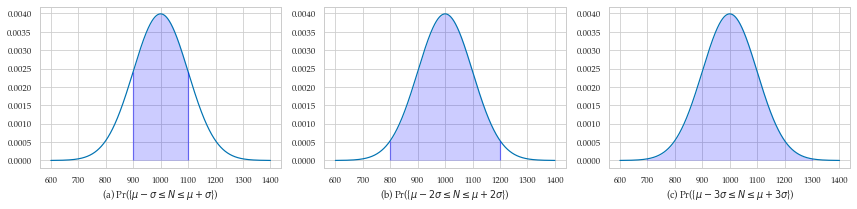

In [46]:
import matplotlib.pyplot as plt
from ministats import calc_prob_and_plot

filename = "figures/bulk_of_the_distribution_panel.pdf"

mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 1
    bulk_interval1 = [mu-n*sigma, mu+n*sigma]
    p1, ax1 = calc_prob_and_plot(rvN, *bulk_interval1, xlims=[600, 1400], ax=ax1,
                                 title="(a) Pr({$\mu-\sigma \leq N \leq \mu+\sigma$})")
    print("n =", n, "interval contains", p1)

    n = 2
    bulk_interval2 = [mu-n*sigma, mu+n*sigma]
    p2, ax2 = calc_prob_and_plot(rvN, *bulk_interval2, xlims=[600, 1400], ax=ax2,
                                 title="(b) Pr({$\mu-2\sigma \leq N \leq \mu+2\sigma$})")
    print("n =", n, "interval contains", p2)

    n = 3
    bulk_interval3 = [mu-n*sigma, mu+n*sigma]
    p3, ax2 = calc_prob_and_plot(rvN, *bulk_interval3, xlims=[600, 1400], ax=ax3,
                                 title="(c) Pr({$\mu-3\sigma \leq N \leq \mu+3\sigma$})")
    print("n =", n, "interval contains", p3)
    
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


### Tails of the normal distribution

We're often interested in tail ends of the distribution, which contain the unlikely events.

In [47]:
mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

for k in [1, 2, 3]:
    # compute the probability in the left tail (-∞,𝜇-k𝜎]
    x_l = mu - k*sigma
    p_l = quad(rvN.pdf, rvN.ppf(0.0000000001), x_l)[0]
    # compute the probability in the right tail [𝜇+k𝜎,∞)
    x_r = mu + k*sigma
    p_r = quad(rvN.pdf, x_r, rvN.ppf(0.9999999999))[0]
    # add together to get total probability in the tails
    p_tails = p_l + p_r
    print(f"Pr( N<{x_l} or N>{x_r} ) = {p_tails:.4f}")

Pr( N<900.0 or N>1100.0 ) = 0.3173
Pr( N<800.0 or N>1200.0 ) = 0.0455
Pr( N<700.0 or N>1300.0 ) = 0.0027


The code below highlights the tails of the distribution and computes the sum of their probability.

p1=0.6826894921370859
p2=0.04550026389615838
p3=0.002699796063060157



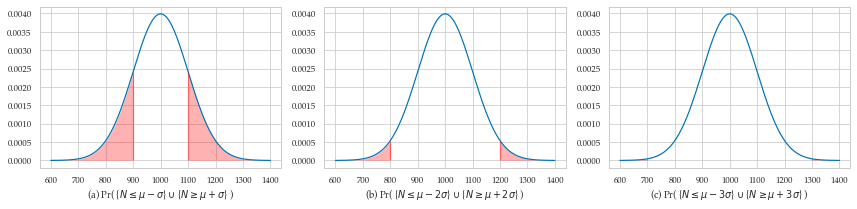

In [48]:
filename = "figures/tails_of_the_distribution_panel.pdf"

from ministats import calc_prob_and_plot_tails


mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable


with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 1
    x_l = mu-n*sigma
    x_r = mu+n*sigma
    title1 = "(a) Pr( {$N \leq \mu-\sigma$} $\cup$ {$N \geq \mu+\sigma$} )"
    p2, ax1 = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400],
                                      ax=ax1, title=title1)

    n = 2
    x_l = mu-n*sigma
    x_r = mu+n*sigma
    title2 = "(b) Pr( {$N \leq \mu-2\sigma$} $\cup$ {$N \geq \mu+2\sigma$} )"
    p2, ax2 = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400],
                                      ax=ax2, title=title2)

    n = 3
    x_l = mu-n*sigma
    x_r = mu+n*sigma
    title3 = "(c) Pr( {$N \leq \mu-3\sigma$} $\cup$ {$N \geq \mu+3\sigma$} )"
    p3, ax3 = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400],
                                      ax=ax3, title=title3)

    print(f"{p1=}\n",f"{p2=}\n",f"{p3=}\n", sep="")

    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


The above calculations leads us to an important rule of thumb: the values of the 5% tail of the distribution are $k=2$ standard deviations away from the mean (more precisely, we should use $k=1.96$ to get exactly 5%). We'll use this facts later in STATS to define a *cutoff value* for events that are unlikely to occur by chance.